In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from underthesea import word_tokenize, pos_tag, sent_tokenize
import warnings
from gensim import corpora, models, similarities
import re
from datetime import datetime

In [2]:
# Load data
products = pd.read_csv('Products.csv')
products.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image
0,48102821,tai bluetooth inpods cảm biến vân chống màu sắ...,dung pin thời gian pin thời gian nhạc liên tục...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,52333193,tai bluetooth không dây true wireless dock sạc...,dung pin thời gian pin thời gian nhạc thời gia...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,299461,chuột không dây logitech silent hàng hãng,logitech độ phân giải quang học model lưu kéo ...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,57440329,loa bluetooth kiêm đồng hồ báo thức robot hàng...,acome indonesia trung quốc sku indonesia tình ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,38458616,tai bluetooth apple airpods pro true wireless ...,apple mỹ tai mm hộp sạc mm model tai g hộp sạc...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [3]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4370 entries, 0 to 4369
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      4370 non-null   int64  
 1   name         4369 non-null   object 
 2   description  4370 non-null   object 
 3   rating       4370 non-null   float64
 4   price        4370 non-null   int64  
 5   list_price   4370 non-null   int64  
 6   brand        4370 non-null   object 
 7   group        4370 non-null   object 
 8   url          4370 non-null   object 
 9   image        4370 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 341.5+ KB


In [4]:
# Concat product_name with description
products['name_description'] = products['name'] + " "+ products['description']
products.head()

,item_id,name,description,rating,price,list_price,brand,group,url,image,name_description
0,48102821,tai bluetooth inpods cảm biến vân chống màu sắ...,dung pin thời gian pin thời gian nhạc liên tục...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,tai bluetooth inpods cảm biến vân chống màu sắ...
1,52333193,tai bluetooth không dây true wireless dock sạc...,dung pin thời gian pin thời gian nhạc thời gia...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,tai bluetooth không dây true wireless dock sạc...
2,299461,chuột không dây logitech silent hàng hãng,logitech độ phân giải quang học model lưu kéo ...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...,chuột không dây logitech silent hàng hãng logi...
3,57440329,loa bluetooth kiêm đồng hồ báo thức robot hàng...,acome indonesia trung quốc sku indonesia tình ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...,loa bluetooth kiêm đồng hồ báo thức robot hàng...
4,38458616,tai bluetooth apple airpods pro true wireless ...,apple mỹ tai mm hộp sạc mm model tai g hộp sạc...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...,tai bluetooth apple airpods pro true wireless ...


In [5]:
products.iloc[0]['name_description']

'tai bluetooth inpods cảm biến vân chống màu sắc đa dạng màu sắc lựa dung pin thời gian pin thời gian nhạc liên tục thời gian sạc thời gian chờ bluetooth oem trung quốc độ nhạy cảm biến vân model jack cắm usb cable thời gian sử dụng thời gian nhạc liên tục sku inpod phiên nâng tai bluetooth thiết kế tỉ lệ chuẩn tai airpod hãng lược nút bấm thân tai thay nút cảm ứng sử dụng dàng thuận tiện thao tác nhạc dàng chạm bluetooth kết nối vô ổn định bluetooth kết nối vô ổn định tai kết nối dock sạc chất âm thời pin cải thiện tối ưu dock sạc tiện lợi sạc pin tai thiết tương thích thiết bluetooth xiaomi samsung apple huawei oppo vivo lenovo tablet v v thời gian nhạc liên tục thời gian sạc thời gian chờ'

In [6]:
# Remove Null values in product_name
products = products[products['name_description'].notnull()]

## Gemsim Modeling + Evaluation

### Tokenize (split) the sentnces into word

In [7]:
start_time = datetime.now()

In [8]:
products['name_description_wt'] = products['name_description'].apply(lambda x: word_tokenize(x, format='text'))

In [9]:
products.iloc[0]['name_description_wt']

'tai bluetooth inpods_cảm biến_vân chống màu_sắc đa_dạng màu_sắc lựa_dung pin thời_gian pin thời_gian nhạc liên_tục thời_gian sạc thời_gian chờ bluetooth oem trung_quốc độ nhạy_cảm biến_vân model jack cắm usb cable thời_gian sử_dụng thời_gian nhạc liên_tục sku inpod phiên nâng tai_bluetooth thiết_kế tỉ_lệ chuẩn tai_airpod hãng lược nút bấm thân_tai thay nút cảm_ứng sử_dụng_dàng thuận_tiện thao_tác nhạc_dàng chạm bluetooth kết_nối vô ổn_định bluetooth kết_nối vô ổn_định tai kết_nối dock sạc_chất âm_thời pin cải_thiện tối_ưu_dock sạc tiện_lợi sạc pin tai_thiết tương_thích thiết_bluetooth xiaomi samsung apple huawei oppo vivo lenovo tablet v v thời_gian nhạc liên_tục thời_gian sạc thời_gian chờ'

In [10]:
# Tokenize(split) the sentences into words
products_gem = [[text for text in x.split()] for x in products['name_description_wt']]

In [11]:
len(products_gem)

4369

In [12]:
products_gem[:1] # Kết quả cho thấy nhiều kí tự không cần thiết => Tiếp tục loại bỏ các kí tự và stopword

[['tai',
  'bluetooth',
  'inpods_cảm',
  'biến_vân',
  'chống',
  'màu_sắc',
  'đa_dạng',
  'màu_sắc',
  'lựa_dung',
  'pin',
  'thời_gian',
  'pin',
  'thời_gian',
  'nhạc',
  'liên_tục',
  'thời_gian',
  'sạc',
  'thời_gian',
  'chờ',
  'bluetooth',
  'oem',
  'trung_quốc',
  'độ',
  'nhạy_cảm',
  'biến_vân',
  'model',
  'jack',
  'cắm',
  'usb',
  'cable',
  'thời_gian',
  'sử_dụng',
  'thời_gian',
  'nhạc',
  'liên_tục',
  'sku',
  'inpod',
  'phiên',
  'nâng',
  'tai_bluetooth',
  'thiết_kế',
  'tỉ_lệ',
  'chuẩn',
  'tai_airpod',
  'hãng',
  'lược',
  'nút',
  'bấm',
  'thân_tai',
  'thay',
  'nút',
  'cảm_ứng',
  'sử_dụng_dàng',
  'thuận_tiện',
  'thao_tác',
  'nhạc_dàng',
  'chạm',
  'bluetooth',
  'kết_nối',
  'vô',
  'ổn_định',
  'bluetooth',
  'kết_nối',
  'vô',
  'ổn_định',
  'tai',
  'kết_nối',
  'dock',
  'sạc_chất',
  'âm_thời',
  'pin',
  'cải_thiện',
  'tối_ưu_dock',
  'sạc',
  'tiện_lợi',
  'sạc',
  'pin',
  'tai_thiết',
  'tương_thích',
  'thiết_bluetooth',
  'xiaom

### Remove some special elements in texts

In [13]:
# Stop word
STOP_WORD_FILE = 'vietnamese-stopwords.txt'

with open(STOP_WORD_FILE, 'r', encoding='utf-8') as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')

In [14]:
# Remove some special elements
products_gem_re = [[re.sub('[0-9]+','', e) for e in text] for text in products_gem] # số
products_gem_re = [[t.lower() for t in text if not t in ['', ' ', ',', '.', '...', '-',':', ';', '?', '%', '(', ')', 
                                                         '+', '/', 'g', 'ml', '▼', '•','__', '【', '【', '✪', '✿', '[', ']', '–', '…', '______________']] for text in  products_gem_re] # ký tự đặc biệt
products_gem_re = [[t for t in text if not t in stop_words] for text in products_gem_re] # stopword

In [15]:
products_gem_re[:1]

[['tai',
  'bluetooth',
  'inpods_cảm',
  'biến_vân',
  'chống',
  'màu_sắc',
  'đa_dạng',
  'màu_sắc',
  'lựa_dung',
  'pin',
  'pin',
  'nhạc',
  'liên_tục',
  'sạc',
  'chờ',
  'bluetooth',
  'oem',
  'trung_quốc',
  'độ',
  'nhạy_cảm',
  'biến_vân',
  'model',
  'jack',
  'cắm',
  'usb',
  'cable',
  'nhạc',
  'liên_tục',
  'sku',
  'inpod',
  'phiên',
  'nâng',
  'tai_bluetooth',
  'thiết_kế',
  'tỉ_lệ',
  'chuẩn',
  'tai_airpod',
  'hãng',
  'lược',
  'nút',
  'bấm',
  'thân_tai',
  'thay',
  'nút',
  'cảm_ứng',
  'sử_dụng_dàng',
  'thuận_tiện',
  'thao_tác',
  'nhạc_dàng',
  'chạm',
  'bluetooth',
  'kết_nối',
  'vô',
  'ổn_định',
  'bluetooth',
  'kết_nối',
  'vô',
  'ổn_định',
  'tai',
  'kết_nối',
  'dock',
  'sạc_chất',
  'âm_thời',
  'pin',
  'cải_thiện',
  'tối_ưu_dock',
  'sạc',
  'tiện_lợi',
  'sạc',
  'pin',
  'tai_thiết',
  'tương_thích',
  'thiết_bluetooth',
  'xiaomi',
  'samsung',
  'apple',
  'huawei',
  'oppo',
  'vivo',
  'lenovo',
  'tablet',
  'v',
  'v',
  'nh

In [16]:
# Obtain the number of features based on dictionary: Use corpora.Dictionary
# dictionary này sẽ đc áp dụng cho các sản phẩm mới
dictionary = corpora.Dictionary(products_gem_re)

In [17]:
# List of features in dictionary
dictionary.token2id

{'apple': 0,
 'biến_vân': 1,
 'bluetooth': 2,
 'bấm': 3,
 'cable': 4,
 'chuẩn': 5,
 'chạm': 6,
 'chống': 7,
 'chờ': 8,
 'cải_thiện': 9,
 'cảm_ứng': 10,
 'cắm': 11,
 'dock': 12,
 'huawei': 13,
 'hãng': 14,
 'inpod': 15,
 'inpods_cảm': 16,
 'jack': 17,
 'kết_nối': 18,
 'lenovo': 19,
 'liên_tục': 20,
 'lược': 21,
 'lựa_dung': 22,
 'model': 23,
 'màu_sắc': 24,
 'nhạc': 25,
 'nhạc_dàng': 26,
 'nhạy_cảm': 27,
 'nâng': 28,
 'nút': 29,
 'oem': 30,
 'oppo': 31,
 'phiên': 32,
 'pin': 33,
 'samsung': 34,
 'sku': 35,
 'sạc': 36,
 'sạc_chất': 37,
 'sử_dụng_dàng': 38,
 'tablet': 39,
 'tai': 40,
 'tai_airpod': 41,
 'tai_bluetooth': 42,
 'tai_thiết': 43,
 'thao_tác': 44,
 'thay': 45,
 'thiết_bluetooth': 46,
 'thiết_kế': 47,
 'thuận_tiện': 48,
 'thân_tai': 49,
 'tiện_lợi': 50,
 'trung_quốc': 51,
 'tương_thích': 52,
 'tỉ_lệ': 53,
 'tối_ưu_dock': 54,
 'usb': 55,
 'v': 56,
 'vivo': 57,
 'vô': 58,
 'xiaomi': 59,
 'âm_thời': 60,
 'đa_dạng': 61,
 'độ': 62,
 'ổn_định': 63,
 'bluetooth_mẽ': 64,
 'bluetooth_tần

In [18]:
# Numbers of features (word) in dictionary
feature_cnt = len(dictionary.token2id)
feature_cnt

48095

In [19]:
# Obtain corpus based on dictionary (dense matrix)
corpus = [dictionary.doc2bow(text) for text in products_gem]

In [20]:
corpus[0] # id, so lan xuat hien cua token trong van ban/ san pham

[(0, 1),
 (1, 2),
 (2, 4),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 2),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 3),
 (19, 1),
 (20, 3),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 2),
 (25, 3),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 2),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 4),
 (34, 1),
 (35, 1),
 (36, 4),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 2),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 2),
 (57, 1),
 (58, 2),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 2)]

In [21]:
# Use TF-IDF Model to process corpus, obtaining index
tfidf = models.TfidfModel(corpus)
# tính toán sự tương tự trong ma trận thưa thớt
index = similarities.SparseMatrixSimilarity(tfidf[corpus],
                                            num_features = feature_cnt)
# ma trận: n xn

In [22]:
# # when user choose one product
# # giả sử chọn sản phẩm đầu tiên để xem, index=0
# product_selection = products.head(1)
# product_selection

In [23]:
# # sản phẩm đanh xem
# name_description_pre = product_selection['name_description_wt'].to_string(index=False)
# name_description_pre

In [24]:
# view_product = name_description_pre.lower().split()

In [25]:
# # Convert search words into Sparse Vectors
# kw_vector = dictionary.doc2bow(view_product)
# kw_vector

In [26]:
# # similarity calculation
# sim = index[tfidf[kw_vector]]

In [27]:
# # print result
# for i in range(len(sim)):
#     # Vì lấy mẫu đầu tiên để xem nên bỏ qua mẫu đầu tiên
#     if i!=0:
#         print('keyword is similar to doc_index %d: %.2f' % (i, sim[i]))

In [28]:
# # Giả sử sản phẩm liên quan nhất có index là 1 như trên
# product_famillier = products.iloc[[1]]

In [29]:
# product_famillier

In [30]:
products = products.reset_index()
products.head()

,index,item_id,name,description,rating,price,list_price,brand,group,url,image,name_description,name_description_wt
0,0,48102821,tai bluetooth inpods cảm biến vân chống màu sắ...,dung pin thời gian pin thời gian nhạc liên tục...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...,tai bluetooth inpods cảm biến vân chống màu sắ...,tai bluetooth inpods_cảm biến_vân chống màu_sắ...
1,1,52333193,tai bluetooth không dây true wireless dock sạc...,dung pin thời gian pin thời gian nhạc thời gia...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...,tai bluetooth không dây true wireless dock sạc...,tai bluetooth không dây true wireless dock sạc...
2,2,299461,chuột không dây logitech silent hàng hãng,logitech độ phân giải quang học model lưu kéo ...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...,chuột không dây logitech silent hàng hãng logi...,chuột không dây logitech silent hàng hãng logi...
3,3,57440329,loa bluetooth kiêm đồng hồ báo thức robot hàng...,acome indonesia trung quốc sku indonesia tình ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...,loa bluetooth kiêm đồng hồ báo thức robot hàng...,loa bluetooth kiêm đồng_hồ báo_thức robot hàng...
4,4,38458616,tai bluetooth apple airpods pro true wireless ...,apple mỹ tai mm hộp sạc mm model tai g hộp sạc...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...,tai bluetooth apple airpods pro true wireless ...,tai bluetooth apple airpods pro true wireless ...


In [31]:
end_time = datetime.now()
print('Thời gian để chạy mô hình Gensim:', end_time-start_time)

Thời gian để chạy mô hình Gensim: 0:01:00.056262


In [32]:
# Đề xuất cho sản phẩm đang xem
def recommender (view_product, dictionary, tdidf, index):
    # Convert search words into Sparse Vectors
    view_product = view_product.lower().split()
    kw_vector = dictionary.doc2bow(view_product)
    print("Virew produc's vector:")
    print(kw_vector)
    # Similarity calculation
    sim = index[tfidf[kw_vector]]

    # Print result
    list_id = []
    list_score = []
    for i in range(len(sim)):
        list_id.append(i)
        list_score.append(sim[i])

    df_result = pd.DataFrame({'id': list_id,
                            'score': list_score})

    # five highest scores
    five_highest_score = df_result.sort_values(by='score', ascending= False).head(6)
    print("Five highest scores: ")
    print(five_highest_score)
    print("Ids to list")
    idToList = list(five_highest_score['id'])
    print(idToList)

    products_find = products[products.index.isin(idToList)]
    results = products_find[["index", "item_id", "name"]]
    results = pd.concat([results, five_highest_score], axis=1).sort_values(by = 'score', ascending=False)
    return results

## 5 mặt hàng tương tự mặt hàng có item_id = 299461

In [33]:
item_id = 299461
view_product = products[products['item_id'] == item_id]['name_description_wt'].to_string(index=False)
view_product

'chuột không dây logitech silent hàng hãng logit...'

In [34]:
start = datetime.now()
results = recommender(view_product, dictionary, tfidf, index)
end = datetime.now()

Virew produc's vector:
[(14, 1), (78, 1), (90, 1), (159, 1), (179, 1), (189, 1), (209, 1)]
Five highest scores: 
      id     score
355  355  0.573554
28    28  0.479241
102  102  0.475186
893  893  0.436527
2      2  0.432601
156  156  0.402008
Ids to list
[355, 28, 102, 893, 2, 156]


In [35]:
print('Time taken:', end - start)

Time taken: 0:00:00.008995


In [36]:
results

,index,item_id,name,id,score
355,355,515550,bàn phím chuột không dây logitech hàng hãng,355,0.573554
28,28,916784,chuột không dây logitech slient hàng hãng,28,0.479241
102,102,67907870,chuột bluetooth silent logitech pebble hàng hãng,102,0.475186
893,893,76781356,chuột không dây logitech black cổng usb hàng hãng,893,0.436527
2,2,299461,chuột không dây logitech silent hàng hãng,2,0.432601
156,156,916764,chuột không dây logitech multi device hàng hãng,156,0.402008


In [37]:
# sử dụng keyword
start = datetime.now()
results = recommender('sáng da', dictionary, tfidf, index)
end = datetime.now()

Virew produc's vector:
[(1529, 1)]
Five highest scores: 
        id     score
203    203  0.419964
675    675  0.394229
818    818  0.341600
880    880  0.340966
897    897  0.305015
1162  1162  0.299820
Ids to list
[203, 675, 818, 880, 897, 1162]


In [38]:
print('Time taken:', end - start)

Time taken: 0:00:00.006053


In [39]:
results

,index,item_id,name,id,score
203,203,58470334,thảm da trải bàn,203,0.419964
675,675,47815131,bao da ốp dẻo silicon mềm mại ipad inch new ba...,675,0.394229
818,818,72014868,ốp lưng da iphone pro pro max mini,818,0.341600
880,880,55780679,bao da kèm bàn phím bluetooth samsung tab lite...,880,0.340966
897,897,68592591,ghế game bọc da ghế game bọc da đệm su non ghế...,897,0.305015
1162,1162,12321426,khăn da cừu lau ống kính máy ảnh,1162,0.299820


#### Nhận xét chung: 

    - Thời gian chạy mô hình Cosine là 58s
    - Thời gian chạy mô hình Gensim là 1m11s
    
    - Thời gian chạy gợi ý theo product_id của Cosine là 0.002s
    - Thời gian chạy gợi ý theo product_id của Gensim là 0.008s
    
    - Thời gian chạy gợi ý theo keyword của Cosine là 0.01s
    - Thời gian chạy gợi ý theo keyword của Gensim là 0.006s
    
**Gợi ý theo mô hình Cosine với cùng product_id**    
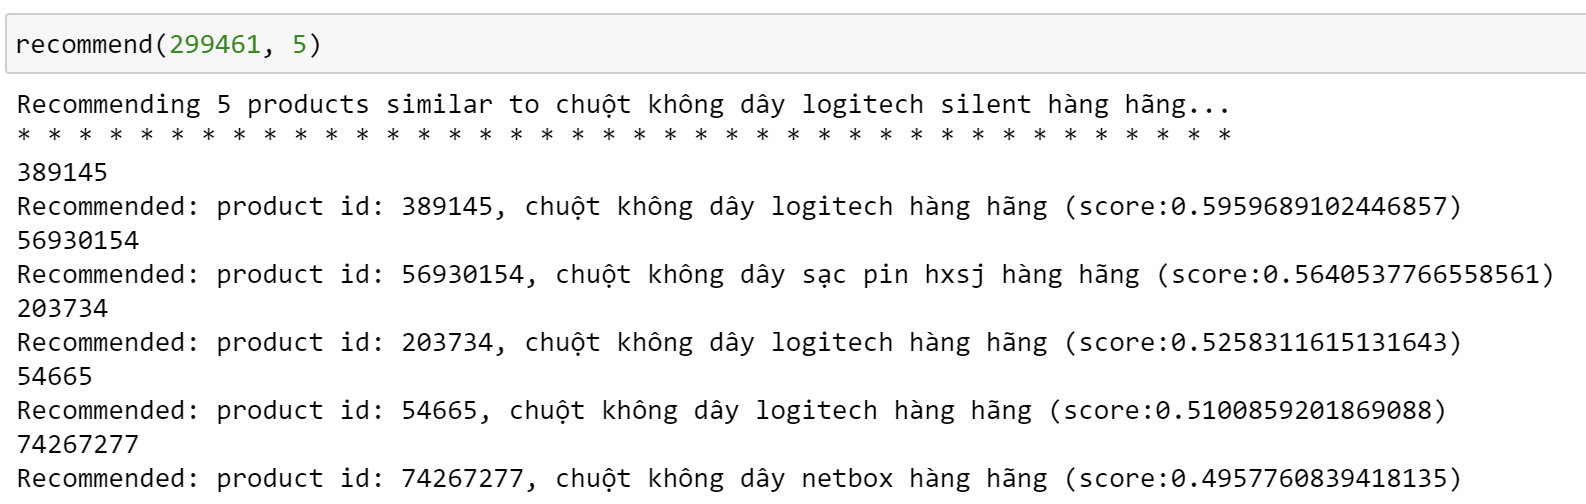  
* Có thể thấy score của Gensim cho id này nhỏ hơn score của Cosine
* Vì mỗi mô hình đều có những cách tính toán khác nhau vì vậy, kết quả dự đoán có thể chênh lệch nhau. Công ty cần dựa trên nhu cầu kinh doanh để  lựa chọn mô hình có những đề xuất phù hợp nhất.
* Mô hình Cosine đối với trường hợp gợi ý theo keyword sẽ mất thời gian hơn Gensim rất nhiều vì cần chạy lại matrix.
* Đối với dự án này, chọn mô hình Gensim tối ưu hơn đối với dữ liệu càng lớn.
